# Associations with Correlations
Author: Brad Sheese

---


## 07.2.1.0 Introduction to Measures of Association
We will often want to know the strength and direction of an association between two variables. For example, we might ask if increases in age are associated with increases in the risk of heart attack. We might find no evidence of an association if our data showed that increased age does not come with increased risk. Or, we might find that there is an association, such that as age increases heart attack risk also increases. We could try to get at this question simply through plotting, but we can also use statistical tools to get more precise answers to how variables are associated with one another. 

For now, we are going to be talking about simple linear associations. By simple linear association, I mean that we are going to use statistics to see if we can use a 'straight line' to describe the association. In these cases, increases in one variable are associated with either increases or decreases in the other, without a complicated pattern where the rate of increase or decrease changes depending on where we look. If the association is non-linear, it wouldn't fit a straight line. In these cases, increases in one variable can sometimes be associated increases in the other and can sometimes be associated with decreases. For example, if we plotted the association between your body temperature and your biological functioning we would find that both very low and very high body temperatures would be associated with poor functioning, but there's a sweet spot in the middle. If we plotted this with the temperature on the x-axis it would look like an inverted U-shape. That U-shape is showing us a non-linear association. 

There are sometimes good reasons to look at non-linear associations, but linear associations are simple to understand and compute, and they serve as a good place to start.

We are primarily going to be talking about two things when we describe an association: the direction and the strength. 

### Describing the Direction of Association
We when talk about the 'direction' of an association, there are three possibilities:
* Positive association: increases in one variable are associated with increases in the other. For example, age and heart attack risk. 
* Negative association: increases in one variable are associated with decreases in the other. For example, exercise and heart attack risk.
* No association: increases or decreases in one variable are unrelated to increase or decreases in the other variable. For example, preference for cilantro and heart attack risk. 

When we say an association is positive or negative, we are not saying anything about the strength of association. So saying two variables have positive or negative association does not mean the association is significant or strong. 

Positive or negative directions are also not absolute truths about how two variables are associated. Positive and negative can change depending on how you have scaled your variables. It we are rating things from 1 to 10, 1 might be the best (rank your top ten favorite movies!), or 1 might be the worst (rate your restaurant experience from 1 to 10!). To appropriately intepret the direction of association between two variables, you should always think about how the variables are scaled. 

### Describing the Strength of Association
When we talk about the strength of an association, we are talking about how well you can predict one if you have the other. Perfect correlations mean if you know the one variable you can tell the value of the other exactly. No correlation or a corrleation that approaches zero indicates a very weak or non-existent association. In this case, knowing the value of one variable will tell you almost nothing about the value of the other. 

Correlations are commonly expressed as coefficients. A nonexistent association is represented by coefficient value of 0, a perfect positive correlation by +1.0, and a perfect negative correlation by -1.0. In practice, correlation coefficients will range somewhere between these extremes. Whether or not a correlation of .70 (or any other value) is considered a strong association depends on your field. In fields where there is a lot of error, usually because we are studying things we can't precisely control or measure, observed correlations tend to be quite low. In fields with a lot of precision and control, correlations can be quite high and correlations are only considered strong if they are above .90. So the bottom line here is that how the strength of associations is interpreted depends on the field and the context of the analysis. You can't just look at a correlation like .42 and say, "Oh, that's a really weak association." You will need what we call "domain-knowledge", or knowledge of the field you are working in, to interpret the strength of associations.

Let's look as some scatterplots, so we can see some associations that vary in size and direction. ote the size and directions of the correlation coefficient printed above each scatterplot. 


---Variable A correlated with Variable B---
Correlation size and direction: -0.87



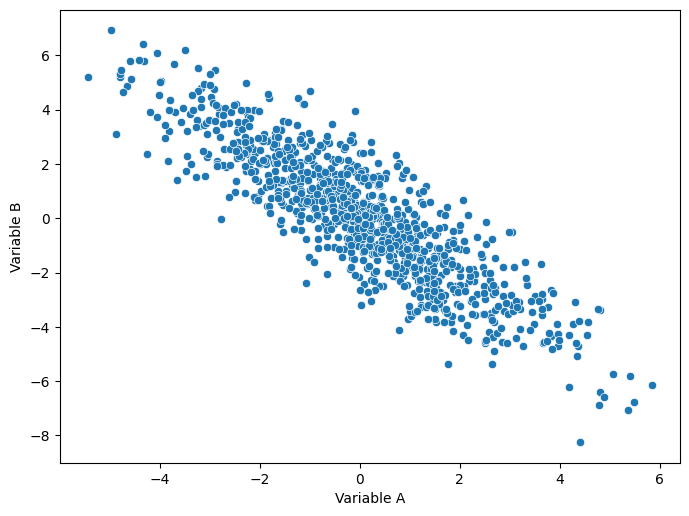


---Variable A correlated with Variable C---
Correlation size and direction: -0.5



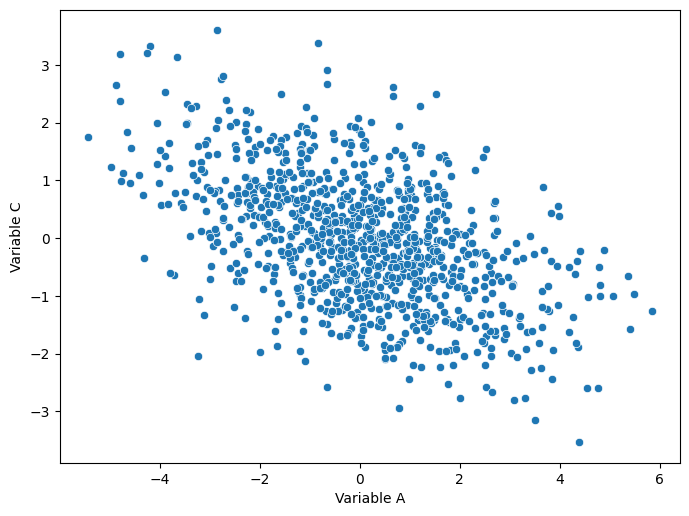


---Variable B correlated with Variable C---
Correlation size and direction: 0.21



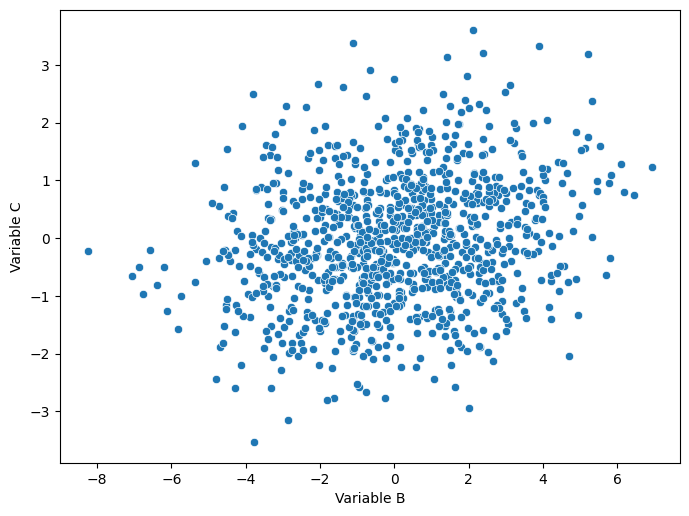

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 

# source: https://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html

num_samples = 1000

# The desired mean values of the sample.
mu = np.array([0.0, 0.0, 0.0])

# The desired covariance matrix.
r = np.array([
        [  3.40, -3.75, -1.00],
        [ -3.75,  5.50,   .50],
        [ -1.00,   .50,  1.25]
    ])

df = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples))
df.columns = ['Variable A', 'Variable B', 'Variable C']

def show_scatter(v1, v2, df):
  print(f'---{v1} correlated with {v2}---')
  rvalue = df[v1].corr(df[v2]).round(2)
  print(f'Correlation size and direction: {rvalue}')
  print()
  sns.scatterplot(x = v1, y = v2, data = df)
  plt.show()
  print()

show_scatter('Variable A', 'Variable B', df)
show_scatter('Variable A', 'Variable C', df)
show_scatter('Variable B', 'Variable C', df)


When you scatter plot two variables that are highly related, the dots representing the data start to look like a line. When you scatter plot two variables that are unrelated, the dots representing the data are randomly scattered and look like a cloud or a blob.   

## 07.2.1.1 Types of Correlation Coefficients (and Types of Data)

There are many different types of correlation coefficients, each of which is used to look at associations in different types of data. If we are doing statistics and we start talking about types of data, we mean something different than the data types we have learned in computer science. In CS we have integers, floats, strings, etc. In statistics we have:
* qualitative data such as:
  * categorical data (orange, apple, pear)
  * binary data (passed, failed)
  * ordinal data (1st place, 2nd place, 3rd place)

* quantitative data, such as:
  * discrete data (number of children, # of students in a classroom)
  * continuous data (height of students, temperature) 

It may have been a while since you have had course work that addressed these data types. [You can read more about them here](https://en.wikipedia.org/wiki/Statistical_data_type). 

Let's start with the most familiar type of data and the most familiar type of correlations. [Pearson's correlations coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (aka the Pearson product-moment correlation coefficient, or the bivariate correlation), is the most commonly used correlation coefficient. If someone talks about a correlation but doesn't give you any additional information, they are probably talking about Pearson's correlation coefficient. 

If your two variables are continuous and [normally distributed](https://en.wikipedia.org/wiki/Normal_distribution), then Pearson's correlation coefficient is appropriate. For example, if we want to do a study examining the association between height and weight, Pearson's r would work just fine. 

However, let's say we wanted to study the association between the letter grade earned in a single course (A, B, C, D, F) with school completion (graduated, did not graduate). Neither variable is continuous or normally distributed. In this case, we would need to use a different statistical tool such as Spearman's Rank Correlation Coefficient, which we will discuss more later.  





## 07.2.1.2 Pearson's r
Let's start with Pearson's since it's the most commonly used. In statistics, a distinction is drawn between calculating the population statistic and the sample statistic. We're not going to go into the distinction right now, just know that everything that follows is about calculating statistics for samples, not for populations. When we calculate Pearson's correlation coefficient for a sample, the statistic is called 'Pearson's r'. (In contrast, when calculated for a population, the correlation coefficient is called Pearson's rho).


### Calculating Covariance
For our calculation, we are going to have two series of data that we will call X and Y. To find the Pearson's r for X and Y, we first need to calculate the [covariance](https://en.wikipedia.org/wiki/Covariance) between X and Y. You can think of the covariance as a representation of the association that isn't standardized yet, so the values aren't constrained between 0 and 1. 

You calculate the covariance of a sample by looking at each data point, getting the difference between each data point and the mean for both X and Y, and multiplying those distances together. We then take those multiplied distances for every data point and sum them all together. 

If big distances in X go along with big distances in Y, then we see a large positive value for the sum. If big distances in X go along with little distances in Y, we will see a large negative value. If distances in X don't go along with distances in Y, we will see smaller values tending toward zero.

In the last step, we will take the sum and divide it by the number of samples (sample size) minus 1. 

If you're comfortable with math notation, the formula that was just described looks like this:

$$q_{jk} = \frac{1}{N - 1}\sum_{i=1}^N \left(X_{ij} - \bar{X}_j\right) \left(X_{ik} - \bar{X}_k\right),$$ 

### Normalizing the Covariance
The last thing we need to do to get Pearson's r is to 'normalize' the score. Normalize usually means that we are changing a number so it meets some kind of standard and is more interpretable. Think of it as translating the covariance into something that is easier to understand. In this case, we will take the covariance and normalize it, so it ranges from 0 to 1 (either positive or negative 1).

Here's how we normalize the covariance: take the covariance of XY and divide it by the standard deviation of X multiplied with the standard deviation of Y. If you don't remember what the standard deviation is go back and look at the Descriptive Statistcs reading. 

## 07.2.1.3 Spearman's Rank Order Correlation
If your data is not continuous or normally distributed, you should look for alternatives to Pearson's r. One of the most common alternatives is [Spearman's rank order correlation coefficient (or Spearman's rho)](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient). If you want to look at associations and you have ranked (ordinal) data to start with, or you have converted your continuous data into ranked data (for example, quiz averages to grades, or lap times into finishing ranks), Spearman's rho will be a more appropriate choice than Pearson's r.

There are two ways to calculate Spearman's correlation depending on whether your ranked data contains any ties. If two or more data points share a rank (for example, tied for first place) then we need to use a formula that shares a lot in common with Pearson's r. If no two data points share a rank, we can use a different formula. 

### Creating Ranked Data
Our first problem is that we need to convert our data into ranks. If we had heights of students in the classroom, we would want to take the heights, sort them from highest to lowest, and then assign them ranks in order. Each student would then have been assigned a rank that would tell them their height relative to the other students.

Doing this sort of ranking does something odd to the data. Let's think about the three tallest students in class. The tallest student, ranked 1, is 10cm taller than the 2nd tallest student, ranked 2. The 2nd tallest student is 50cm taller than the 3rd tallest student. The ranking preserves the order of the students but loses all the information about differences between ranks. If we had just the ranking of the 2nd and 3rd tallest students we would know one was taller than the other but nothing more. There could be a massive or a miniscule difference. Consequnetly, from a statistics perspective, ranking isn't always a good idea. Rankings of various sorts are really commonly done in any place people deal with data. Usually, this is done because people want to simplify things. But in statistics, it is often a bad idea to exchange more informative data for less informative data, so be careful when you convert your data into ranks or other sorts of categories. 

### Calculating Spearman's rho

The formula for Spearman's rho (when there are no tied ranks) is:
$$r_s = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$

Where d represents the difference between the ranks and n is the sample size. 

To implement the formula in code we would do the following:
* convert each series to its ranked equivalent (the ranked series will be referred to as X and Y in the next steps) 
* for each index position, calculate the difference between ranks of series X and Y, then square the difference
* sum the squared differences
* multiply the sums of squared difference by 6, assign the result to `numerator`
* square the sample size, subtract 1, then multiply by the sample size, assign the result to `denominator`
* divide `numerator` by `denomiator` and subtract the result from 1, you now have rho 






## 07.2.1.4 `.corr()`
The Pandas `.corr()` method can be used with either a [series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) or a [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr). It will exclude any missing values before doing it's calculations. It takes an argument `method = ` to specify the type of correlation you want: `'pearson'` for Pearson's r and `'spearman'` for Spearman's rank correlation. 

### Pearson Examples

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Variable A  1000 non-null   float64
 1   Variable B  1000 non-null   float64
 2   Variable C  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [ ]:
# using .corr() with a series using Pearson's r
df.loc[:, 'Variable A'].corr(df.loc[:, 'Variable B'], method = 'pearson')

-0.8719509162039658

In [ ]:
# using .corr() with a dataframe using 
df.corr(method= 'pearson').round(2)

,Variable A,Variable B,Variable C
Variable A,1.00,-0.87,-0.50
Variable B,-0.87,1.00,0.21
Variable C,-0.50,0.21,1.00


### Spearman Examples

In [ ]:
# generate dataframe to use with rank correlations
url = 'https://raw.githubusercontent.com/bsheese/CSDS125ExampleData/master/data_grades-final.csv'
df_grades = pd.read_csv(url)

# drop some columns
drop_list = ['Labs']

for label in df_grades.columns:
  if label.startswith('Q'):
    drop_list.append(label)

df_grades = df_grades.drop(columns = drop_list)

# convert student year to year rank
def year_to_yearrank(year):
  if year == 'first year':
    return 1
  elif year == 'second year':
    return 2
  elif year == 'third year':
    return 3
  else:
    return 4  

df_grades.loc[:, 'Year_ranked'] = df_grades.loc[:, 'Year'].map(year_to_yearrank)

# check the result
df_grades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         18 non-null     object 
 1   Major        18 non-null     object 
 2   Project1     18 non-null     float64
 3   Project2     18 non-null     float64
 4   Exam1        18 non-null     float64
 5   Exam2        18 non-null     float64
 6   Attendance   18 non-null     float64
 7   StudentID    18 non-null     int64  
 8   Exam_Avg     18 non-null     float64
 9   Year_ranked  18 non-null     int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 1.5+ KB


In [ ]:
# example of Spearman rank correlation with a series
df_grades.loc[:, 'Year_ranked'].corr(df_grades.loc[:, 'Exam_Avg'],
                                     method = 'spearman').round(2)

-0.21

In [ ]:
# example of Spearman rank correlation with a dataframe
df_grades.corr(method='spearman').round(2)

,Project1,Project2,Exam1,Exam2,Attendance,StudentID,Exam_Avg,Year_ranked
Project1,1.00,0.70,0.42,0.05,0.31,-0.24,0.28,0.12
Project2,0.70,1.00,0.57,0.24,0.36,-0.04,0.47,0.14
Exam1,0.42,0.57,1.00,0.46,0.49,-0.27,0.85,-0.30
Exam2,0.05,0.24,0.46,1.00,0.54,0.16,0.82,-0.07
Attendance,0.31,0.36,0.49,0.54,1.00,0.11,0.53,-0.26
StudentID,-0.24,-0.04,-0.27,0.16,0.11,1.00,-0.08,0.06
Exam_Avg,0.28,0.47,0.85,0.82,0.53,-0.08,1.00,-0.21
Year_ranked,0.12,0.14,-0.30,-0.07,-0.26,0.06,-0.21,1.00


Note that the result of `.corr()` is a Pandas dataframe that can be modified just as we modify any other Pandas dataframe.

In [ ]:
df_grades.corr(method='spearman').loc[:, ['Exam_Avg', 'Year_ranked']].round(2)

,Exam_Avg,Year_ranked
Project1,0.28,0.12
Project2,0.47,0.14
Exam1,0.85,-0.30
Exam2,0.82,-0.07
Attendance,0.53,-0.26
StudentID,-0.08,0.06
Exam_Avg,1.00,-0.21
Year_ranked,-0.21,1.00
